# 데이터 설정하기

In [23]:
# 데이터 생성하기
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math

# Number of points in the scatter plot
num_points = 100

# Number of clusters
k = 3

# Generating random x and y coordinates
x = np.random.rand(num_points)
y = np.random.rand(num_points)

# Creating a DataFrame
data = pd.DataFrame({'x': x, 'y': y})
data

,x,y
0,0.919812,0.109750
1,0.382869,0.706234
2,0.383699,0.562383
3,0.349553,0.555036
4,0.499811,0.759781
...,...,...
95,0.529315,0.737035
96,0.374843,0.361680
97,0.801235,0.781979
98,0.202915,0.943834


In [24]:
data.columns

Index(['x', 'y'], dtype='object')

In [25]:
def first_cluster(data, k):
    data.columns = ['x', 'y']
    data['cluster'] = 0

    # Generating random centroids
    centroids_x = np.random.uniform(min(data.x), max(data.x), k)
    centroids_y = np.random.uniform(min(data.y), max(data.y), k)

    # Creating a centroid DataFrame
    centroids = pd.DataFrame({'centroid_x': centroids_x, 'centroid_y': centroids_y})

    # Plotting the data points
    sns.scatterplot(data=data, x='x', y='y', label='Data', color = 'black')

    # Plotting the centroids
    sns.scatterplot(data = centroids, x='centroid_x', y='centroid_y', s=200, color='red', label="Centroids")

    # Adding legend and showing the plot
    plt.legend()
    plt.show()
    return data, centroids

# #유클리드 거리 구하기 함수 정의
def distance(a, b):#a, b는 각각 dan, asac, 2차원 벡터
    return math.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2 )

def update_centroid(data, old_centroids):
    new_clusters = []
    for i in data.index:
        # 데이터 하나 가져오기
        point = data.iloc[i, :].tolist()

        dis_centroid = []
        for j in old_centroids.index: 
            # 센터까지의 거리 재기
            c_point = old_centroids.iloc[j, :].tolist()
            dis_centroid.append(distance(point, c_point))
        cluster = np.argmin(dis_centroid)
        # 클러스터 할당
        new_clusters.append(cluster)
        # print(new_clusters)
    new_data = data.copy()
    new_data.cluster = new_clusters
    # display(new_data)

    new_centroids = []

    for j in old_centroids.index:
        new_centroid = new_data[new_data.cluster==j].mean()[:2].tolist()
        new_centroids.append(new_centroid)
    new_centroids = pd.DataFrame(new_centroids, columns = old_centroids.columns)
    # display(new_centroids)

    return new_data, new_centroids

def plot_kmeans(data, centroids, iteration):
    new_data, new_centroids = update_centroid(data, centroids)
    for old, new in zip(centroids.values, new_centroids.values):
        plt.arrow(old[0], old[1], new[0] - old[0], new[1] - old[1], head_width=0.01, head_length=0.01, fc='grey', ec='grey')

    for i in range(iteration):
        old_data = new_data.copy()
        old_centroids = new_centroids.copy()
        new_data, new_centroids = update_centroid(new_data, new_centroids)
        print('diff', np.std(new_data.cluster - old_data.cluster))
        # Drawing arrows from old centroids (blue dots) to new centroids (red dots)
        for old, new in zip(old_centroids.values, new_centroids.values):
            plt.arrow(old[0], old[1], new[0] - old[0], new[1] - old[1], head_width=0.01, head_length=0.01, fc='grey', ec='grey')
    sns.scatterplot(data=centroids, x=centroids.columns[0], y=centroids.columns[1], s=100, color='blue', marker='*')
    sns.scatterplot(data=new_centroids, x=new_centroids.columns[0], y=new_centroids.columns[1], s=500, color='red', marker='*')
    sns.scatterplot(data=new_data, x=new_data.columns[0], y=new_data.columns[1], hue=new_data.columns[2], palette = sns.color_palette())
    plt.show()

def plot_kmeans_final(data, centroids):
    new_data, new_centroids = update_centroid(data, centroids)
    
    # Initially draw arrows from the initial centroids
    for old, new in zip(centroids.values, new_centroids.values):
        plt.arrow(old[0], old[1], new[0] - old[0], new[1] - old[1], head_width=0.01, head_length=0.01, fc='grey', ec='grey')

    old_data = new_data.copy()
    old_centroids = new_centroids.copy()
    i = 0
    while True:
        i += 1
        new_data, new_centroids = update_centroid(old_data, old_centroids)

        # Check if clusters have changed
        if np.array_equal(new_data['cluster'], old_data['cluster']):
            break  # Exit the loop if the cluster assignments are the same

        # Drawing arrows for each iteration
        for old, new in zip(old_centroids.values, new_centroids.values):
            plt.arrow(old[0], old[1], new[0] - old[0], new[1] - old[1], head_width=0.01, head_length=0.01, fc='grey', ec='grey')
        # print("차이",np.std(new_data['cluster'] - old_data['cluster']))
        old_data = new_data.copy()
        old_centroids = new_centroids.copy()
    print(i, '번 cluster가 움직인 결과입니다. 이제 더이상 움직이지 않아요!')        
    # Final scatter plot
    sns.scatterplot(data=centroids, x=centroids.columns[0], y=centroids.columns[1], s=100, color='blue', marker='*')
    sns.scatterplot(data=new_centroids, x=new_centroids.columns[0], y=new_centroids.columns[1], s=500, color='red', marker='*')
    sns.scatterplot(data=new_data, x=new_data.columns[0], y=new_data.columns[1], hue=new_data.columns[2], palette=sns.color_palette())
    plt.show()


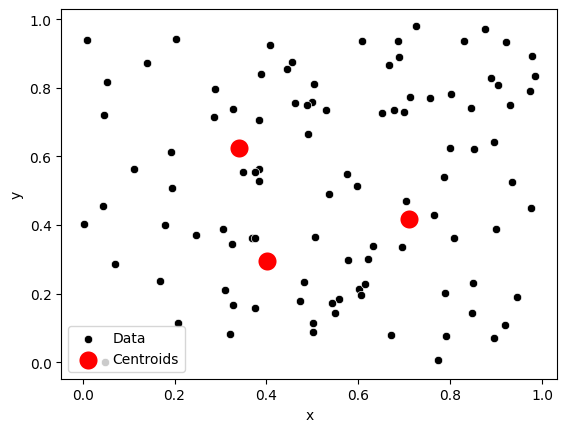

In [26]:
data, centroids = first_cluster(data, k)

diff 0.4534313619501853
diff 0.19899748742132398
diff 0.34117444218463966
diff 0.3994996871087636
diff 0.3315116890850155
diff 0.2233830790368868
diff 0.0
diff 0.0
diff 0.0
diff 0.0
diff 0.0
diff 0.0
diff 0.0
diff 0.0
diff 0.0
diff 0.0
diff 0.0
diff 0.0
diff 0.0
diff 0.0


C:\Users\user\AppData\Local\Temp\ipykernel_35464\1728406487.py:71: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(data=new_data, x=new_data.columns[0], y=new_data.columns[1], hue=new_data.columns[2], palette = sns.color_palette())


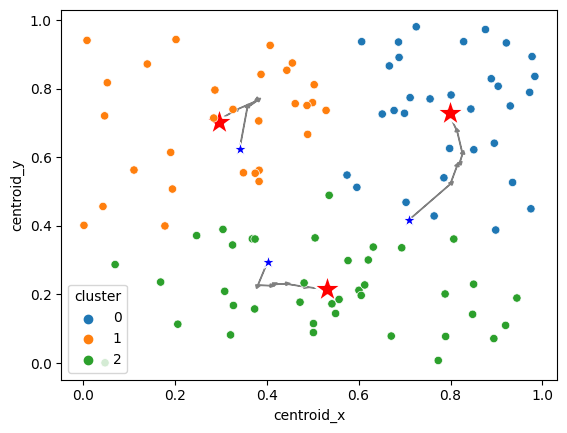

In [27]:
plot_kmeans(data, centroids, 20)

7 번 cluster가 움직인 결과입니다. 이제 더이상 움직이지 않아요!


C:\Users\user\AppData\Local\Temp\ipykernel_35464\1728406487.py:102: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(data=new_data, x=new_data.columns[0], y=new_data.columns[1], hue=new_data.columns[2], palette=sns.color_palette())


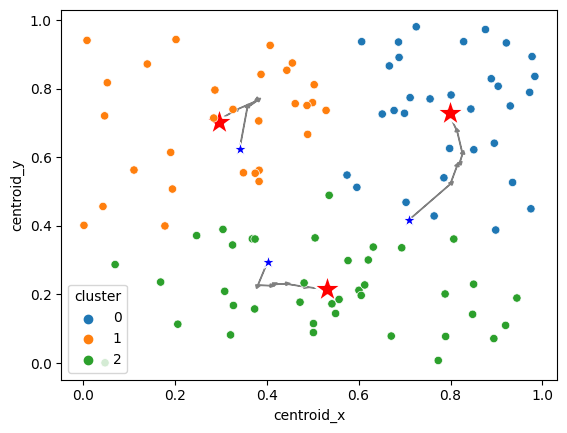

In [28]:
plot_kmeans_final(data, centroids)

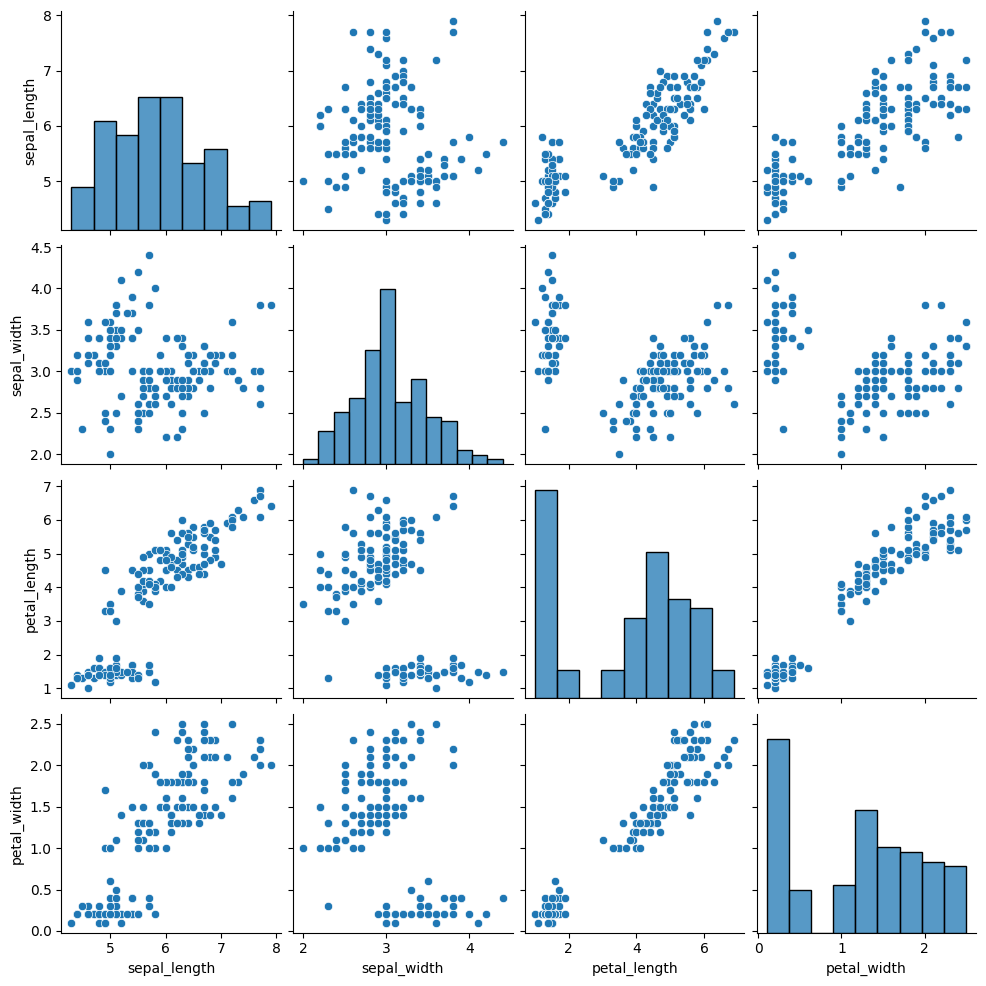

In [37]:
data = sns.load_dataset("iris")
sns.pairplot(data = data)

In [38]:
data = data[['sepal_length', 'sepal_width']]

C:\Users\user\AppData\Local\Temp\ipykernel_35464\1728406487.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = 0


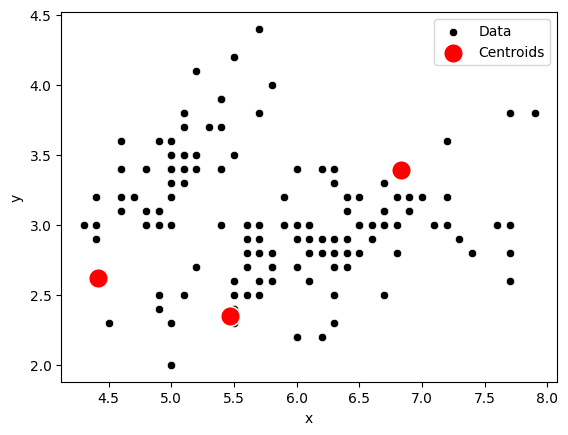

4 번 cluster가 움직인 결과입니다. 이제 더이상 움직이지 않아요!


C:\Users\user\AppData\Local\Temp\ipykernel_35464\1728406487.py:102: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(data=new_data, x=new_data.columns[0], y=new_data.columns[1], hue=new_data.columns[2], palette=sns.color_palette())


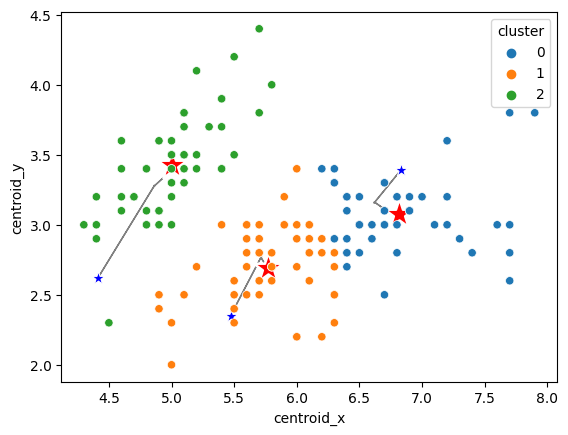

In [39]:
data, centroids = first_cluster(data, k)
plot_kmeans_final(data, centroids)